In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("House Price India.csv")
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [9]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [43]:
df1 = pd.read_csv('House Price India.csv', usecols=['condition of the house', 'Price','number of bedrooms', 'number of bathrooms', 'living area', 'lot area'])
df1

,number of bedrooms,number of bathrooms,living area,lot area,condition of the house,Price
0,5,2.50,3650,9050,5,2380000
1,4,2.50,2920,4000,5,1400000
2,5,2.75,2910,9480,3,1200000
3,4,2.50,3310,42998,3,838000
4,3,2.00,2710,4500,4,805000
...,...,...,...,...,...,...
14615,2,1.50,1556,20000,4,221700
14616,3,2.00,1680,7000,4,219200
14617,2,1.00,1070,6120,3,209000
14618,4,1.00,1030,6621,4,205000


In [44]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14615    False
14616    False
14617    False
14618    False
14619    False
Length: 14620, dtype: bool

In [45]:
df1.drop_duplicates()

,number of bedrooms,number of bathrooms,living area,lot area,condition of the house,Price
0,5,2.50,3650,9050,5,2380000
1,4,2.50,2920,4000,5,1400000
2,5,2.75,2910,9480,3,1200000
3,4,2.50,3310,42998,3,838000
4,3,2.00,2710,4500,4,805000
...,...,...,...,...,...,...
14615,2,1.50,1556,20000,4,221700
14616,3,2.00,1680,7000,4,219200
14617,2,1.00,1070,6120,3,209000
14618,4,1.00,1030,6621,4,205000


In [46]:
X = df1[['condition of the house','number of bedrooms', 'number of bathrooms', 'living area', 'lot area']]
y = df1["Price"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.25,shuffle=True)

In [48]:
X_train

,condition of the house,number of bedrooms,number of bathrooms,living area,lot area
6050,4,4,1.75,2190,9225
12767,3,2,1.00,810,9882
9066,3,3,1.75,1270,8422
6782,5,5,3.25,5210,35765
980,4,3,2.75,2170,7900
...,...,...,...,...,...
12119,4,3,1.00,960,10125
8039,3,3,2.50,2760,9471
14147,3,5,1.50,1980,7958
6936,4,2,1.50,940,5000


In [49]:
X_test

,condition of the house,number of bedrooms,number of bathrooms,living area,lot area
4274,3,4,2.00,1700,8640
8110,4,2,2.50,2390,6928
11675,3,3,2.00,1670,17071
7580,3,3,1.50,1240,7733
2534,3,3,2.50,2480,5137
...,...,...,...,...,...
12552,4,3,1.75,1810,7950
6939,3,2,2.00,1370,5756
6065,3,2,1.75,930,7080
6358,3,4,2.50,2920,7901


In [50]:
y_train

6050      375000
12767     170000
9066      340000
6782     2200000
980       296500
          ...   
12119     179950
8039      800000
14147     215000
6936      392000
5640      410000
Name: Price, Length: 10965, dtype: int64

In [51]:
y_test

4274     500000
8110     787500
11675    325000
7580     375000
2534     717000
          ...  
12552    443000
6939     380000
6065     275000
6358     760000
5253     255000
Name: Price, Length: 3655, dtype: int64

In [52]:
df1.ndim

2

In [54]:
# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting prices for the test data
y_pred = model.predict(X_test)

In [57]:
y_pred

array([350951.67270832, 759114.43486905, 399897.98939227, ...,
       229667.312192  , 745310.67174448, 319056.50426111])

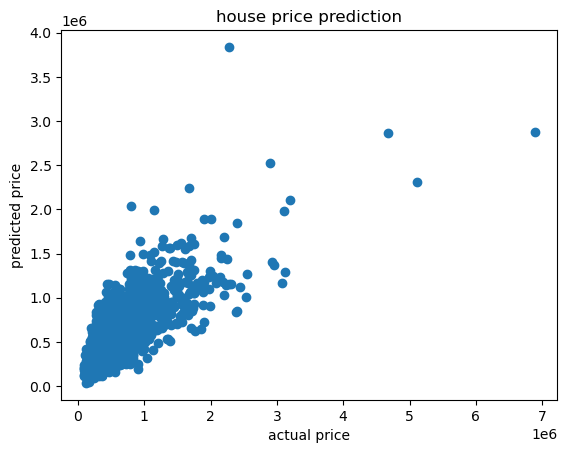

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('house price prediction')
plt.show()

In [2]:
new_df = pd.DataFrame({
    'condition of the house':[3],
    'number of bedrooms':[4],
    'number of bathroom':[2.5],
    'living area':[3000],
    'lot area':[8000]
})
predict_price = model.predict(new_df)
print('Predicted price for the new house : ', predict_price[0])

NameError: name 'pd' is not defined